In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set(style="white")

In [3]:
from datetime import datetime
from sklearn.model_selection import train_test_split

In [4]:
accident_data = pd.read_csv('road-safety/dftRoadSafety_Accidents_2016.csv', 
                            dtype={"Did_Police_Officer_Attend_Scene_of_Accident": int})

/Users/mohitsharma/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
print(accident_data.columns[31])

LSOA_of_Accident_Location


In [6]:
print(accident_data['LSOA_of_Accident_Location'])

0         E01000543
1         E01000375
2         E01033725
3         E01003379
4         E01002583
5         E01001180
6         E01004658
7         E01000243
8         E01002875
9         E01001658
10        E01002011
11        E01000248
12        E01032769
13        E01001132
14        E01000095
15        E01000489
16        E01004692
17        E01003837
18        E01002667
19        E01002640
20        E01000036
21        E01001569
22        E01002605
23        E01002889
24        E01001465
25        E01002901
26        E01002038
27        E01033731
28        E01033590
29        E01000781
            ...    
136591          NaN
136592          NaN
136593          NaN
136594          NaN
136595          NaN
136596          NaN
136597          NaN
136598          NaN
136599          NaN
136600          NaN
136601          NaN
136602          NaN
136603          NaN
136604          NaN
136605          NaN
136606          NaN
136607          NaN
136608          NaN
136609          NaN


In [7]:
print(accident_data.shape)
print(accident_data.head)

(136621, 32)
<bound method DataFrame.head of        Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0       2016010000005               519310.0                188730.0   
1       2016010000006               551920.0                174560.0   
2       2016010000008               505930.0                183850.0   
3       2016010000016               527770.0                168930.0   
4       2016010000018               510740.0                177230.0   
5       2016010000019               530840.0                167100.0   
6       2016010000020               527610.0                181430.0   
7       2016010000021               523830.0                189460.0   
8       2016010000023               524640.0                180620.0   
9       2016010000024               540670.0                174700.0   
10      2016010000025               528300.0                188290.0   
11      2016010000028               524180.0                196480.0   
12      20160100000

In [8]:
print(accident_data.describe())

       Location_Easting_OSGR  Location_Northing_OSGR      Longitude  \
count          136614.000000            1.366140e+05  136614.000000   
mean           448699.363169            2.883354e+05      -1.304881   
std             95230.253169            1.570588e+05       1.398947   
min             76702.000000            1.107500e+04      -7.389809   
25%            386355.750000            1.764248e+05      -2.204357   
50%            454126.000000            2.374855e+05      -1.201205   
75%            527660.000000            3.897438e+05      -0.159708   
max            655256.000000            1.178623e+06       1.757858   

            Latitude   Police_Force  Accident_Severity  Number_of_Vehicles  \
count  136614.000000  136621.000000      136621.000000       136621.000000   
mean       52.482399      29.860402           2.816170            1.848179   
std         1.414390      25.252440           0.418152            0.710117   
min        49.919716       1.000000           1.

In [9]:
print(accident_data.isnull().sum())

Accident_Index                                    0
Location_Easting_OSGR                             7
Location_Northing_OSGR                            7
Longitude                                         7
Latitude                                          7
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                              2
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                      37
Junction_Detail                                   0
Junction_Con

In [10]:
# Extract month from date
def month_from_date(date):
    dmyyyy = datetime.strptime(date, '%d/%m/%Y')
    return int(datetime.strftime(dmyyyy, '%m'))

In [11]:
accident_data['Month_of_Year'] = accident_data['Date'].apply(month_from_date)
print(accident_data['Month_of_Year'].head())

0    11
1    11
2    11
3    11
4    11
Name: Month_of_Year, dtype: int64


In [12]:
# Extract hour from time
def hour_from_time(time):
    try:
        hhmm = datetime.strptime(time, '%H:%M')
        return int(datetime.strftime(hhmm, '%H'))
    except Exception:
        # Some times are nan
        return 0

In [13]:
accident_data['Hour_of_Day'] = accident_data['Time'].apply(hour_from_time)
print(accident_data['Hour_of_Day'].head())

0    2
1    0
2    1
3    9
4    7
Name: Hour_of_Day, dtype: int64


In [14]:
print(accident_data.columns)

Index([u'Accident_Index', u'Location_Easting_OSGR', u'Location_Northing_OSGR',
       u'Longitude', u'Latitude', u'Police_Force', u'Accident_Severity',
       u'Number_of_Vehicles', u'Number_of_Casualties', u'Date', u'Day_of_Week',
       u'Time', u'Local_Authority_(District)', u'Local_Authority_(Highway)',
       u'1st_Road_Class', u'1st_Road_Number', u'Road_Type', u'Speed_limit',
       u'Junction_Detail', u'Junction_Control', u'2nd_Road_Class',
       u'2nd_Road_Number', u'Pedestrian_Crossing-Human_Control',
       u'Pedestrian_Crossing-Physical_Facilities', u'Light_Conditions',
       u'Weather_Conditions', u'Road_Surface_Conditions',
       u'Special_Conditions_at_Site', u'Carriageway_Hazards',
       u'Urban_or_Rural_Area', u'Did_Police_Officer_Attend_Scene_of_Accident',
       u'LSOA_of_Accident_Location', u'Month_of_Year', u'Hour_of_Day'],
      dtype='object')


In [15]:
accident_data = accident_data.drop(['Number_of_Vehicles', 'Local_Authority_(District)', 
                                    'Police_Force', 'Location_Easting_OSGR', 
                                    'Location_Northing_OSGR', 'Speed_limit',
                                    '1st_Road_Class', 'Road_Type', 'Date', 'Time', 
                                    'Junction_Detail', 'Junction_Control', '2nd_Road_Class', 
                                    '2nd_Road_Number', 'Special_Conditions_at_Site', 
                                    'Carriageway_Hazards', 'Number_of_Casualties',
                                    'Pedestrian_Crossing-Physical_Facilities', 
                                    'Pedestrian_Crossing-Human_Control',
                                    'Did_Police_Officer_Attend_Scene_of_Accident', 
                                    'Local_Authority_(Highway)', 
                                    'LSOA_of_Accident_Location', 'Accident_Severity', 
                                    '1st_Road_Number'], axis=1)
print(accident_data.columns)

Index([u'Accident_Index', u'Longitude', u'Latitude', u'Day_of_Week',
       u'Light_Conditions', u'Weather_Conditions', u'Road_Surface_Conditions',
       u'Urban_or_Rural_Area', u'Month_of_Year', u'Hour_of_Day'],
      dtype='object')


In [16]:
print(accident_data.isnull().sum())

Accident_Index             0
Longitude                  7
Latitude                   7
Day_of_Week                0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Urban_or_Rural_Area        0
Month_of_Year              0
Hour_of_Day                0
dtype: int64


In [17]:
accident_data = accident_data[np.isfinite(accident_data['Longitude'])]
accident_data = accident_data[np.isfinite(accident_data['Latitude'])]
print(accident_data.isnull().sum())
print(accident_data.head())

Accident_Index             0
Longitude                  0
Latitude                   0
Day_of_Week                0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Urban_or_Rural_Area        0
Month_of_Year              0
Hour_of_Day                0
dtype: int64
  Accident_Index  Longitude   Latitude  Day_of_Week  Light_Conditions  \
0  2016010000005  -0.279323  51.584754            3                 5   
1  2016010000006   0.184928  51.449595            3                 4   
2  2016010000008  -0.473837  51.543563            3                 4   
3  2016010000016  -0.164442  51.404958            3                 1   
4  2016010000018  -0.406580  51.483139            3                 1   

   Weather_Conditions  Road_Surface_Conditions  Urban_or_Rural_Area  \
0                   1                        1                    1   
1                   1                        1                    1   
2                   1                        

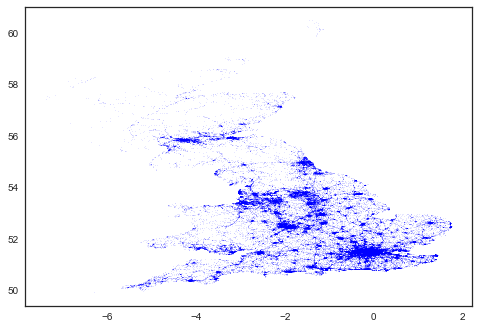

In [18]:
# Plot the accident coordinates
plt.plot(accident_data.Longitude, accident_data.Latitude, 'b.', ms=0.5)

In [19]:
print ("There are", len(accident_data.index), "unique accidents")

('There are', 136614, 'unique accidents')


In [20]:
casualty_data = pd.read_csv('road-safety/Cas.csv')

In [21]:
casualty_data = casualty_data[casualty_data.Casualty_Type==1]
casualty_data = casualty_data.drop(['Bus_or_Coach_Passenger', 'Car_Passenger', 
                                    'Pedestrian_Movement', 'Pedestrian_Location', 
                                    'Casualty_Reference', 'Vehicle_Reference', 
                                    'Casualty_Class', 'Age_of_Casualty',  
                                    'Casualty_Severity', 'Casualty_IMD_Decile', 
                                    'Pedestrian_Road_Maintenance_Worker'], axis=1)
casualty_data.head()

,Accident_Index,Sex_of_Casualty,Age_Band_of_Casualty,Casualty_Type,Casualty_Home_Area_Type
4,2016010000018,1,6,1,1
17,2016010000046,1,4,1,1
29,2016010000058,1,5,1,1
35,2016010000069,1,6,1,1
36,2016010000072,1,5,1,1


In [22]:
print ("There are", len(casualty_data.index), "cycling casualties")

('There are', 18477, 'cycling casualties')


In [23]:
casualty_and_accident_data = pd.merge(accident_data, casualty_data, on='Accident_Index', 
                                      how='left')
print(casualty_and_accident_data.columns)

Index([u'Accident_Index', u'Longitude', u'Latitude', u'Day_of_Week',
       u'Light_Conditions', u'Weather_Conditions', u'Road_Surface_Conditions',
       u'Urban_or_Rural_Area', u'Month_of_Year', u'Hour_of_Day',
       u'Sex_of_Casualty', u'Age_Band_of_Casualty', u'Casualty_Type',
       u'Casualty_Home_Area_Type'],
      dtype='object')


In [24]:
casualty_and_accident_data = casualty_and_accident_data.drop(['Accident_Index'], axis=1)
print(casualty_and_accident_data.columns)

Index([u'Longitude', u'Latitude', u'Day_of_Week', u'Light_Conditions',
       u'Weather_Conditions', u'Road_Surface_Conditions',
       u'Urban_or_Rural_Area', u'Month_of_Year', u'Hour_of_Day',
       u'Sex_of_Casualty', u'Age_Band_of_Casualty', u'Casualty_Type',
       u'Casualty_Home_Area_Type'],
      dtype='object')


In [25]:
casualty_and_accident_data.fillna(0, inplace=True)

In [26]:
casualty_and_accident_data['Casualty_Type'] = casualty_and_accident_data['Casualty_Type'].astype(int)

In [27]:
casualty_and_accident_data = casualty_and_accident_data.rename(columns={'Casualty_Type': 'Cycling_Accident'})

In [28]:
print(casualty_and_accident_data.head)

<bound method DataFrame.head of         Longitude   Latitude  Day_of_Week  Light_Conditions  \
0       -0.279323  51.584754            3                 5   
1        0.184928  51.449595            3                 4   
2       -0.473837  51.543563            3                 4   
3       -0.164442  51.404958            3                 1   
4       -0.406580  51.483139            3                 1   
5       -0.121004  51.387813            3                 1   
6       -0.162234  51.517333            3                 1   
7       -0.213859  51.590341            3                 1   
8       -0.205302  51.510716            3                 1   
9        0.023193  51.453758            3                 1   
10      -0.149795  51.578827            3                 1   
11      -0.206323  51.653353            3                 1   
12      -0.043075  51.512977            3                 1   
13      -0.042906  51.382307            3                 1   
14       0.146399  51.5

In [29]:
print(casualty_and_accident_data.columns)

Index([u'Longitude', u'Latitude', u'Day_of_Week', u'Light_Conditions',
       u'Weather_Conditions', u'Road_Surface_Conditions',
       u'Urban_or_Rural_Area', u'Month_of_Year', u'Hour_of_Day',
       u'Sex_of_Casualty', u'Age_Band_of_Casualty', u'Cycling_Accident',
       u'Casualty_Home_Area_Type'],
      dtype='object')


In [30]:
latitude_min = min(casualty_and_accident_data['Latitude'])
latitude_max = max(casualty_and_accident_data['Latitude'])
longitude_min = min(casualty_and_accident_data['Longitude'])
longitude_max = max(casualty_and_accident_data['Longitude'])
print(latitude_min," ",latitude_max," ",longitude_min," ",longitude_max)

(49.919715999999994, ' ', 60.490191000000003, ' ', -7.3898089999999996, ' ', 1.7578580000000001)


In [31]:
latitude_step = (latitude_max - latitude_min) / 1000
longitude_step = (longitude_max - longitude_min) / 1000
print(latitude_step,longitude_step)

(0.01057047500000001, 0.009147667)


In [33]:
def calc_lat_area(current_lat):
    return int((current_lat - latitude_min) / latitude_step)
def calc_lon_area(current_lon):
    return int((current_lon - longitude_min) / longitude_step)
casualty_and_accident_data["Latitude_Area"] = list(map(calc_lat_area, casualty_and_accident_data["Latitude"]))
casualty_and_accident_data["Longitude_Area"] = list(map(calc_lon_area, casualty_and_accident_data["Longitude"]))
print(casualty_and_accident_data["Latitude_Area"].describe())
print(casualty_and_accident_data["Longitude_Area"].describe())

count    136827.000000
mean        241.941313
std         133.784348
min           0.000000
25%         147.000000
50%         199.000000
75%         329.000000
max         999.000000
Name: Latitude_Area, dtype: float64
count    136827.000000
mean        664.709436
std         152.937134
min           0.000000
25%         566.000000
50%         676.000000
75%         790.000000
max        1000.000000
Name: Longitude_Area, dtype: float64


In [34]:
casualty_and_accident_data = casualty_and_accident_data.drop(['Longitude', 'Latitude'], axis=1)
print(casualty_and_accident_data.head())
print(casualty_and_accident_data.columns)

   Day_of_Week  Light_Conditions  Weather_Conditions  Road_Surface_Conditions  \
0            3                 5                   1                        1   
1            3                 4                   1                        1   
2            3                 4                   1                        1   
3            3                 1                   1                        1   
4            3                 1                   1                        1   

   Urban_or_Rural_Area  Month_of_Year  Hour_of_Day  Sex_of_Casualty  \
0                    1             11            2              0.0   
1                    1             11            0              0.0   
2                    1             11            1              0.0   
3                    1             11            9              0.0   
4                    1             11            7              1.0   

   Age_Band_of_Casualty  Cycling_Accident  Casualty_Home_Area_Type  \
0               

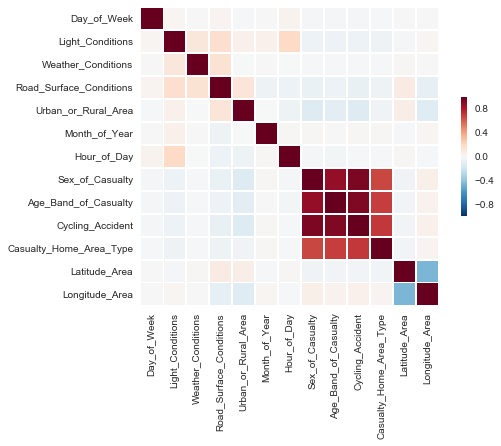

In [36]:
corr = casualty_and_accident_data.corr()
sns.heatmap(corr, square=True, linewidths=.4, cbar_kws={"shrink": .4})
plt.show()